
## Section 1: Problem Formulation

### Introduction:
In this project, we aim to explore the effectiveness of contrastive learning, specifically using the SimCLR algorithm, 
for image classification tasks under the constraint of having limited labeled data. Contrastive learning is a technique 
in self-supervised learning that learns to encode similar items closer in the feature space while pushing dissimilar items further apart.


In [1]:
# Import necessary libraries
import torch
import torchvision
from torch import nn

# Check if CUDA is available and set the device accordingly
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
args = {
    "dataset": "cifar10",
    "model": "resnet18",
    "batch_size": 256,
    "epochs": 100,
    "n_views": 2,
    "out_dim": 128,
    "lr": 3e-4,
    "wd": 1e-6,
    "log_every_n_steps": 50,
    "n_workers": 4,
    "temperature": 0.07,
}


## Section 2: Dataset Preparations

In this section, we will prepare the CIFAR-10, CIFAR-100, and MedMNIST datasets for training. 
We will apply necessary transformations and split the datasets into training, validation, and test sets.


In [8]:
from dataset import SimCLRDataset
data = SimCLRDataset(args["dataset"])
train_dataset = data.get_dataset(n_views=args["n_views"])
train_loader = torch.utils.data.DataLoader(
    train_dataset, 
    batch_size=args["batch_size"], 
    num_workers=args["n_workers"],
    shuffle=True, 
    drop_last=True, 
    pin_memory=True,
)

Files already downloaded and verified


## Section 3: Deep Learning Model

In this section, we will prepare the popular choice of deep learning model like ResNet18 and VGG16.


In [9]:
from model import SimCLRCNN 
model = SimCLRCNN(backbone=args["model"], out_dim=args["out_dim"])
model = model.to(device)

## Section 4: Contrastive Training

In [10]:
from utils import metric, info_nce_loss

In [11]:
from tqdm import tqdm

n_iter = 0
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'], weight_decay=args['wd'])
records = []

for epoch_counter in range(args['epochs']):

    for images, _ in tqdm(train_loader):
        images = torch.cat(images, dim=0)
        images = images.to(device)
        features = model(images)
        logits, labels = info_nce_loss(features, device, args)
        loss = criterion(logits, labels)
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        if n_iter % args['log_every_n_steps'] == 0:
            top1, top5 = metric(logits, labels, topk=(1, 5))

        n_iter += 1

    print(f"Epoch: {epoch_counter}\tLoss: {loss:.4f}\tTop1 accuracy: {top1[0]:.4f}")
    records.append({"epoch": epoch_counter, "loss": loss.item(), "top1": top1[0].item(), "top5": top5[0].item()})

print("Training has finished.")
# save model checkpoints

100%|██████████| 195/195 [00:38<00:00,  5.06it/s]


Epoch: 0	Loss: 5.3650	Top1 accuracy: 5.2734


100%|██████████| 195/195 [00:37<00:00,  5.17it/s]


Epoch: 1	Loss: 5.1513	Top1 accuracy: 7.6172


100%|██████████| 195/195 [00:37<00:00,  5.22it/s]


Epoch: 2	Loss: 4.7299	Top1 accuracy: 16.6016


100%|██████████| 195/195 [00:37<00:00,  5.23it/s]


Epoch: 3	Loss: 4.6284	Top1 accuracy: 18.9453


100%|██████████| 195/195 [00:37<00:00,  5.23it/s]


Epoch: 4	Loss: 4.4386	Top1 accuracy: 21.0938


100%|██████████| 195/195 [00:37<00:00,  5.20it/s]


Epoch: 5	Loss: 4.4268	Top1 accuracy: 23.0469


100%|██████████| 195/195 [00:37<00:00,  5.21it/s]


Epoch: 6	Loss: 4.1912	Top1 accuracy: 24.6094


100%|██████████| 195/195 [00:37<00:00,  5.17it/s]


Epoch: 7	Loss: 4.0123	Top1 accuracy: 27.1484


100%|██████████| 195/195 [00:37<00:00,  5.26it/s]


Epoch: 8	Loss: 4.0900	Top1 accuracy: 22.4609


100%|██████████| 195/195 [00:37<00:00,  5.24it/s]


Epoch: 9	Loss: 3.7856	Top1 accuracy: 25.7812


100%|██████████| 195/195 [00:37<00:00,  5.18it/s]


Epoch: 10	Loss: 3.7661	Top1 accuracy: 28.3203


100%|██████████| 195/195 [00:37<00:00,  5.26it/s]


Epoch: 11	Loss: 3.7851	Top1 accuracy: 31.6406


100%|██████████| 195/195 [00:37<00:00,  5.25it/s]


Epoch: 12	Loss: 3.7922	Top1 accuracy: 35.7422


100%|██████████| 195/195 [00:37<00:00,  5.24it/s]


Epoch: 13	Loss: 3.3877	Top1 accuracy: 32.2266


100%|██████████| 195/195 [00:37<00:00,  5.20it/s]


Epoch: 14	Loss: 3.5663	Top1 accuracy: 34.3750


100%|██████████| 195/195 [00:37<00:00,  5.23it/s]


Epoch: 15	Loss: 3.6613	Top1 accuracy: 34.7656


100%|██████████| 195/195 [00:37<00:00,  5.21it/s]


Epoch: 16	Loss: 3.5318	Top1 accuracy: 37.5000


100%|██████████| 195/195 [00:37<00:00,  5.24it/s]


Epoch: 17	Loss: 3.1258	Top1 accuracy: 39.8438


100%|██████████| 195/195 [00:37<00:00,  5.18it/s]


Epoch: 18	Loss: 3.2950	Top1 accuracy: 37.1094


100%|██████████| 195/195 [00:37<00:00,  5.13it/s]


Epoch: 19	Loss: 3.2209	Top1 accuracy: 33.2031


100%|██████████| 195/195 [00:38<00:00,  5.12it/s]


Epoch: 20	Loss: 3.3156	Top1 accuracy: 40.8203


100%|██████████| 195/195 [00:38<00:00,  5.10it/s]


Epoch: 21	Loss: 3.4055	Top1 accuracy: 41.0156


100%|██████████| 195/195 [00:38<00:00,  5.09it/s]


Epoch: 22	Loss: 3.2315	Top1 accuracy: 41.4062


100%|██████████| 195/195 [00:38<00:00,  5.09it/s]


Epoch: 23	Loss: 3.0469	Top1 accuracy: 43.7500


100%|██████████| 195/195 [00:37<00:00,  5.14it/s]


Epoch: 24	Loss: 3.5615	Top1 accuracy: 41.2109


100%|██████████| 195/195 [00:37<00:00,  5.14it/s]


Epoch: 25	Loss: 2.8085	Top1 accuracy: 39.4531


100%|██████████| 195/195 [00:37<00:00,  5.24it/s]


Epoch: 26	Loss: 3.0822	Top1 accuracy: 41.6016


100%|██████████| 195/195 [00:40<00:00,  4.82it/s]


Epoch: 27	Loss: 3.1925	Top1 accuracy: 40.0391


100%|██████████| 195/195 [00:37<00:00,  5.24it/s]


Epoch: 28	Loss: 3.1164	Top1 accuracy: 39.4531


100%|██████████| 195/195 [00:37<00:00,  5.25it/s]


Epoch: 29	Loss: 2.8079	Top1 accuracy: 43.1641


100%|██████████| 195/195 [00:37<00:00,  5.26it/s]


Epoch: 30	Loss: 2.8882	Top1 accuracy: 43.7500


100%|██████████| 195/195 [00:37<00:00,  5.25it/s]


Epoch: 31	Loss: 2.6705	Top1 accuracy: 44.3359


100%|██████████| 195/195 [00:37<00:00,  5.26it/s]


Epoch: 32	Loss: 2.9369	Top1 accuracy: 41.0156


100%|██████████| 195/195 [00:36<00:00,  5.27it/s]


Epoch: 33	Loss: 2.7908	Top1 accuracy: 44.5312


100%|██████████| 195/195 [00:37<00:00,  5.24it/s]


Epoch: 34	Loss: 2.7323	Top1 accuracy: 50.9766


100%|██████████| 195/195 [00:37<00:00,  5.24it/s]


Epoch: 35	Loss: 2.5377	Top1 accuracy: 46.2891


100%|██████████| 195/195 [00:37<00:00,  5.26it/s]


Epoch: 36	Loss: 2.7627	Top1 accuracy: 50.7812


100%|██████████| 195/195 [00:37<00:00,  5.27it/s]


Epoch: 37	Loss: 2.8846	Top1 accuracy: 50.1953


100%|██████████| 195/195 [00:37<00:00,  5.25it/s]


Epoch: 38	Loss: 2.6014	Top1 accuracy: 49.0234


100%|██████████| 195/195 [00:37<00:00,  5.24it/s]


Epoch: 39	Loss: 2.7863	Top1 accuracy: 49.8047


100%|██████████| 195/195 [00:37<00:00,  5.26it/s]


Epoch: 40	Loss: 3.0623	Top1 accuracy: 47.4609


100%|██████████| 195/195 [00:36<00:00,  5.30it/s]


Epoch: 41	Loss: 2.7185	Top1 accuracy: 45.5078


100%|██████████| 195/195 [00:36<00:00,  5.28it/s]


Epoch: 42	Loss: 2.7973	Top1 accuracy: 48.2422


100%|██████████| 195/195 [00:37<00:00,  5.27it/s]


Epoch: 43	Loss: 2.4727	Top1 accuracy: 52.3438


100%|██████████| 195/195 [00:37<00:00,  5.26it/s]


Epoch: 44	Loss: 2.3944	Top1 accuracy: 49.2188


100%|██████████| 195/195 [00:37<00:00,  5.24it/s]


Epoch: 45	Loss: 2.5231	Top1 accuracy: 51.1719


100%|██████████| 195/195 [00:37<00:00,  5.20it/s]


Epoch: 46	Loss: 2.2999	Top1 accuracy: 42.3828


100%|██████████| 195/195 [00:37<00:00,  5.26it/s]


Epoch: 47	Loss: 2.3325	Top1 accuracy: 49.0234


100%|██████████| 195/195 [00:37<00:00,  5.24it/s]


Epoch: 48	Loss: 2.5837	Top1 accuracy: 52.5391


100%|██████████| 195/195 [00:36<00:00,  5.29it/s]


Epoch: 49	Loss: 2.3896	Top1 accuracy: 57.6172


100%|██████████| 195/195 [00:37<00:00,  5.24it/s]


Epoch: 50	Loss: 2.4404	Top1 accuracy: 55.0781


100%|██████████| 195/195 [00:37<00:00,  5.26it/s]


Epoch: 51	Loss: 2.1414	Top1 accuracy: 51.9531


100%|██████████| 195/195 [00:37<00:00,  5.24it/s]


Epoch: 52	Loss: 2.3682	Top1 accuracy: 48.8281


100%|██████████| 195/195 [00:36<00:00,  5.28it/s]


Epoch: 53	Loss: 2.5623	Top1 accuracy: 48.8281


100%|██████████| 195/195 [00:37<00:00,  5.25it/s]


Epoch: 54	Loss: 2.5591	Top1 accuracy: 53.1250


100%|██████████| 195/195 [00:37<00:00,  5.23it/s]


Epoch: 55	Loss: 2.3511	Top1 accuracy: 60.3516


100%|██████████| 195/195 [00:36<00:00,  5.28it/s]


Epoch: 56	Loss: 2.3300	Top1 accuracy: 57.6172


100%|██████████| 195/195 [00:37<00:00,  5.24it/s]


Epoch: 57	Loss: 2.2700	Top1 accuracy: 62.1094


100%|██████████| 195/195 [00:37<00:00,  5.24it/s]


Epoch: 58	Loss: 2.4054	Top1 accuracy: 56.0547


100%|██████████| 195/195 [00:37<00:00,  5.23it/s]


Epoch: 59	Loss: 2.4322	Top1 accuracy: 56.6406


100%|██████████| 195/195 [00:36<00:00,  5.30it/s]


Epoch: 60	Loss: 2.4515	Top1 accuracy: 55.2734


100%|██████████| 195/195 [00:37<00:00,  5.16it/s]


Epoch: 61	Loss: 2.4294	Top1 accuracy: 53.9062


100%|██████████| 195/195 [00:37<00:00,  5.24it/s]


Epoch: 62	Loss: 2.2428	Top1 accuracy: 55.6641


100%|██████████| 195/195 [00:37<00:00,  5.25it/s]


Epoch: 63	Loss: 2.3649	Top1 accuracy: 60.7422


100%|██████████| 195/195 [00:37<00:00,  5.23it/s]


Epoch: 64	Loss: 2.3616	Top1 accuracy: 49.4141


100%|██████████| 195/195 [00:37<00:00,  5.27it/s]


Epoch: 65	Loss: 2.1541	Top1 accuracy: 58.9844


100%|██████████| 195/195 [00:36<00:00,  5.28it/s]


Epoch: 66	Loss: 2.0564	Top1 accuracy: 55.6641


100%|██████████| 195/195 [00:36<00:00,  5.28it/s]


Epoch: 67	Loss: 2.1669	Top1 accuracy: 54.2969


100%|██████████| 195/195 [00:36<00:00,  5.28it/s]


Epoch: 68	Loss: 2.3977	Top1 accuracy: 61.9141


100%|██████████| 195/195 [00:37<00:00,  5.23it/s]


Epoch: 69	Loss: 2.4782	Top1 accuracy: 52.3438


100%|██████████| 195/195 [00:37<00:00,  5.26it/s]


Epoch: 70	Loss: 2.3763	Top1 accuracy: 54.6875


100%|██████████| 195/195 [00:37<00:00,  5.23it/s]


Epoch: 71	Loss: 2.4766	Top1 accuracy: 60.9375


100%|██████████| 195/195 [00:37<00:00,  5.24it/s]


Epoch: 72	Loss: 2.2281	Top1 accuracy: 53.7109


100%|██████████| 195/195 [00:37<00:00,  5.23it/s]


Epoch: 73	Loss: 2.6002	Top1 accuracy: 60.1562


100%|██████████| 195/195 [00:37<00:00,  5.25it/s]


Epoch: 74	Loss: 2.2695	Top1 accuracy: 54.4922


100%|██████████| 195/195 [00:37<00:00,  5.25it/s]


Epoch: 75	Loss: 2.1679	Top1 accuracy: 56.2500


100%|██████████| 195/195 [00:37<00:00,  5.23it/s]


Epoch: 76	Loss: 1.9983	Top1 accuracy: 60.1562


100%|██████████| 195/195 [00:37<00:00,  5.25it/s]


Epoch: 77	Loss: 2.5906	Top1 accuracy: 61.3281


100%|██████████| 195/195 [00:37<00:00,  5.21it/s]


Epoch: 78	Loss: 2.0346	Top1 accuracy: 62.1094


100%|██████████| 195/195 [00:37<00:00,  5.19it/s]


Epoch: 79	Loss: 2.2174	Top1 accuracy: 51.3672


100%|██████████| 195/195 [00:37<00:00,  5.21it/s]


Epoch: 80	Loss: 2.1116	Top1 accuracy: 60.3516


100%|██████████| 195/195 [00:36<00:00,  5.28it/s]


Epoch: 81	Loss: 2.4260	Top1 accuracy: 52.5391


100%|██████████| 195/195 [00:37<00:00,  5.22it/s]


Epoch: 82	Loss: 2.0726	Top1 accuracy: 57.4219


100%|██████████| 195/195 [00:37<00:00,  5.26it/s]


Epoch: 83	Loss: 2.0828	Top1 accuracy: 58.9844


100%|██████████| 195/195 [00:36<00:00,  5.28it/s]


Epoch: 84	Loss: 1.8796	Top1 accuracy: 61.5234


100%|██████████| 195/195 [00:37<00:00,  5.26it/s]


Epoch: 85	Loss: 2.0162	Top1 accuracy: 62.8906


100%|██████████| 195/195 [00:36<00:00,  5.27it/s]


Epoch: 86	Loss: 2.1951	Top1 accuracy: 60.5469


100%|██████████| 195/195 [00:37<00:00,  5.18it/s]


Epoch: 87	Loss: 2.0834	Top1 accuracy: 63.6719


100%|██████████| 195/195 [00:37<00:00,  5.26it/s]


Epoch: 88	Loss: 2.0350	Top1 accuracy: 63.2812


100%|██████████| 195/195 [00:36<00:00,  5.28it/s]


Epoch: 89	Loss: 2.0374	Top1 accuracy: 64.4531


100%|██████████| 195/195 [00:38<00:00,  5.13it/s]


Epoch: 90	Loss: 2.0017	Top1 accuracy: 58.5938


100%|██████████| 195/195 [00:37<00:00,  5.24it/s]


Epoch: 91	Loss: 2.0830	Top1 accuracy: 58.9844


100%|██████████| 195/195 [00:37<00:00,  5.25it/s]


Epoch: 92	Loss: 2.3107	Top1 accuracy: 60.1562


100%|██████████| 195/195 [00:37<00:00,  5.21it/s]


Epoch: 93	Loss: 2.3245	Top1 accuracy: 55.6641


100%|██████████| 195/195 [00:38<00:00,  5.12it/s]


Epoch: 94	Loss: 1.9400	Top1 accuracy: 58.2031


100%|██████████| 195/195 [00:37<00:00,  5.21it/s]


Epoch: 95	Loss: 2.0564	Top1 accuracy: 61.3281


100%|██████████| 195/195 [00:37<00:00,  5.22it/s]


Epoch: 96	Loss: 2.1004	Top1 accuracy: 60.7422


100%|██████████| 195/195 [00:37<00:00,  5.23it/s]


Epoch: 97	Loss: 2.2307	Top1 accuracy: 61.5234


100%|██████████| 195/195 [00:37<00:00,  5.25it/s]


Epoch: 98	Loss: 2.1096	Top1 accuracy: 57.8125


100%|██████████| 195/195 [00:37<00:00,  5.22it/s]

Epoch: 99	Loss: 2.2408	Top1 accuracy: 58.5938
Training has finished.


In [13]:
import pandas as pd
df = pd.DataFrame.from_records(records)
display(df)

,epoch,loss,top1,top5
0,0,5.364954,5.273438,13.085938
1,1,5.151347,7.617188,20.898438
2,2,4.729871,16.601562,29.492188
3,3,4.628399,18.945312,29.492188
4,4,4.438607,21.093750,39.453125
...,...,...,...,...
95,95,2.056359,61.328125,75.976562
96,96,2.100417,60.742188,78.320312
97,97,2.230705,61.523438,76.171875
98,98,2.109598,57.812500,72.070312


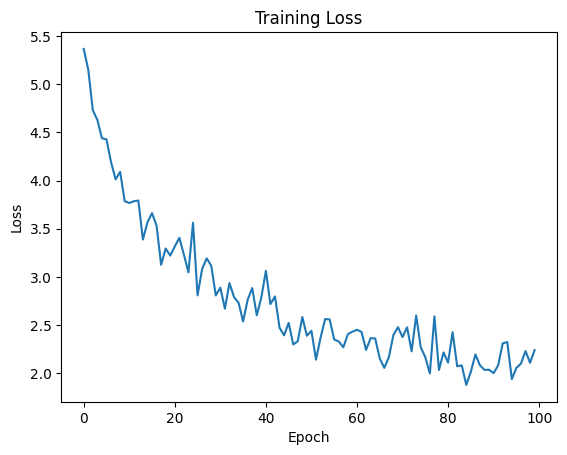

In [16]:
import matplotlib.pyplot as plt
plt.plot(df['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

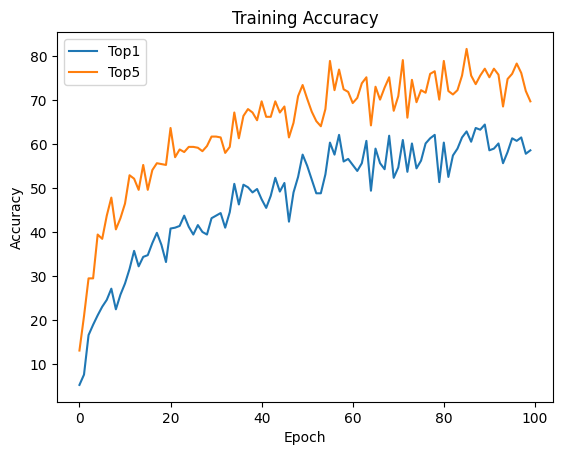

In [17]:
plt.plot(df['top1'])
plt.plot(df['top5'])
plt.legend(['Top1', 'Top5'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')
plt.show()
